## HitRatio Estimation

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.figure as fig
import math

fname = ["astro", "blast2_p", "bump", "dpot", "eddy", "fish", "sedov_p", "yf17_p", "yf17_t"]
err = [1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e-0] # point-wise relative error bound
intvCapacity = 2097152
color = ["coral","crimson","cyan","fuchsia","gold","lime","magenta","navy","teal"]


In [12]:
hitratio_o = []
with open("eddy-hitratio.txt") as inputfile:
    for line in inputfile:
        hitratio_o.append(float(line.strip('\n')))

hitratio_o=np.flip(hitratio_o,0)
print("original hitratio:",hitratio_o)
# estimation of real_precision(average of precision)
data=[]
with open('eddy-data.txt') as inputfile:
    for line in inputfile:
        data.append(float(line.strip('\n')))

subdata = 0
j=0
for i in range(0,len(data)):
    if(i%32==0):
        j=j+1
        subdata = subdata+data[i]
mean_sub = subdata/j # the mean of points that decides the real_precision


original hitratio: [  1.10000000e-05   1.13000000e-04   1.14300000e-03   1.10400000e-02
   1.08858000e-01   7.82599000e-01   9.60098000e-01   9.98256000e-01
   9.99933000e-01   9.99986000e-01   9.99993000e-01   9.99993000e-01]


In [30]:
err = [1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e-0] # point-wise relative error bound
radius_o=[0.044922,0.453125,4.499998,45.999978,463.999779,4607.997803,45055.978516,458751.781250,4456445.875000,46137322.000000,452984616.000000,4563400576.000000]

# i=0
hitratio_esti = []
for i in range(0,12):
#     hitratio_esti = []
    PredAbsErr = []
    with open("eddy-1e-"+str(i)+"-prediction_error.txt") as inputfile:
        for line in inputfile:
            PredAbsErr.append(float(line.strip('\n')))

    radius_esti = radius_o[i]
    count = 0
    for h in range(0,len(PredAbsErr)):
        if (abs(PredAbsErr[h])< radius_esti):
            count = count+1
    print(count)        
    hitratio_esti.append(count/len(data))

381
5059
50958
117941
137212
155905
165848
29028
3120
323
32
3


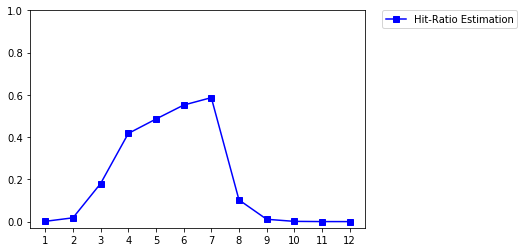

In [14]:
plt.plot(np.arange(1,13),hitratio_esti,'bs-',label="Hit-Ratio Estimation")
#plt.plot(np.arange(1,13),hitratio_o,'rD-',label="Hit-Ratio Original")

lgd=plt.legend(loc=2, bbox_to_anchor=(1.05,1),borderaxespad=0)
plt.rc('font', size=15)          # controls default text sizes
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.yticks([0,.2,.4,.6,.8,1])
# plt.title('Original/Estimation of Hit-Ratio(Astro)')
# plt.savefig('astro_hre.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()
plt.clf()

0.061404874458629376
0.12280974891725875
0.18421462337588812
0.2456194978345175
0.3070243722931469
0.36842924675177624
0.42983412121040565
0.491238995669035
0.5526438701276644
0.6140487445862938
0.6754536190449232
0.7368584935035525


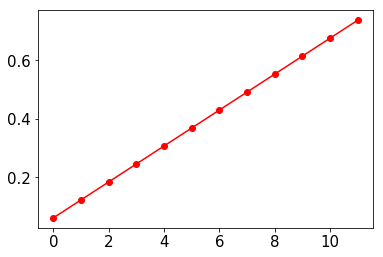

In [33]:
# How Sz does this
dataLength = len(data)
spaceFillingValue = data
segment_size = 32
hit = 0
hr = []
for i in range(0,12):
    pwrErrBound = []
    with open('Eddy/eddy-1e-'+str(i)+'-prediction.txt') as inputfile:
        for line in inputfile:
            pwrErrBound.append(float(line.strip('\n')))

    intvCapacity = 2097152
    j=0

    realPrecision = pwrErrBound[j]
    checkRadius = (intvCapacity-1)*realPrecision

    for i in range(2,dataLength):

        curData = spaceFillingValue[i];
        if(i%segment_size==0):
            realPrecision = pwrErrBound[j]
            j= j + 1
            checkRadius = (intvCapacity-1)*realPrecision;
#         print(checkRadius)
        # pred = 2*last3CmprsData[0] - last3CmprsData[1];
        pred = 2*spaceFillingValue[i-1]-spaceFillingValue[i-2]
        predAbsErr = abs(curData - pred);

        if(predAbsErr<checkRadius):
            hit = hit + 1;
    hr.append(hit/dataLength)
    print(hit/dataLength);
    
plt.plot(np.arange(0,12),hr,'ro-')
plt.show()

In [31]:
j

8831

### Original Check_Radius

0.044922
0.453125
4.499998
45.999978
463.999779
4607.997803
45055.978516
458751.781250
4456445.875000
46137322.000000
452984616.000000
4563400576.000000

### Estimated Check_Radius

65.25199
652.51993
6525.19937
65251.99377
652519.93771
6525199.37717
65251993.77176
652519937.71761
6525199377.17610
65251993771.76102
652519937717.6102
6525199377176.103

### Scaled Estimated Check_Radius

0.06525
0.65251
6.52519
65.25199
652.51993
6525.19937
65251.99377
652519.93771
6525199.37717
65251993.77176
652519937.71761
6525199377.17610

In [17]:
# # visualization
# density,bins = np.histogram(prederr_esti,bins=500,density=True)

# fig, ((ax1, ax2),(ax3, ax4))  = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(8,8))
# widths = bins[:-1] - bins[1:]
# ￼

# x=np.arange(-.2,.2,.001)
# y = 1/(std*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*std**2))/max(1/(std*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*std**2)))/1.5

# ax3.bar(bins[1:],density,widths)
# ax4.bar(bins[1:],density/density.sum(),widths,label="normalized hist")
# ax4.plot(x, y,linewidth=2.5, color='r',label="fitted Gaussian model")

# ax2.set_ylabel('Not normalized')
# ax4.set_ylabel('Normalized')

# ax4.set_xlim([-.2,.2])
# ax1.set_ylim([0,300])
# ax2.set_ylim([0,.005])

# fig.tight_layout()
# plt.show()
# plt.clf()